# 08 Decoupling example
With the `pyFBS` also decoupling of different substructers can be performed in relatively simple manner. In this example a numerical example is used to demonstrate a basic coupling example with a virtual point transformation at the interface.

In [2]:
import pyFBS

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

#### Example Datasests
Load the required predefined datasets:

In [3]:
pyFBS.download_lab_testbench()

100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 6978.88it/s]

In [4]:
pos_xlsx = r"./lab_testbench/Measurements/decoupling_example.xlsx"

stl_dir_A = r"./lab_testbench/STL/A.stl"
stl_dir_B = r"./lab_testbench/STL/B.stl"
stl_dir_AB = r"./lab_testbench/STL/AB.stl"

df_acc_A = pd.read_excel(pos_xlsx, sheet_name='Sensors_A')
df_chn_A = pd.read_excel(pos_xlsx, sheet_name='Channels_A')
df_imp_A = pd.read_excel(pos_xlsx, sheet_name='Impacts_A')

df_acc_B = pd.read_excel(pos_xlsx, sheet_name='Sensors_B')
df_chn_B = pd.read_excel(pos_xlsx, sheet_name='Channels_B')
df_imp_B = pd.read_excel(pos_xlsx, sheet_name='Impacts_B')

df_acc_AB = pd.read_excel(pos_xlsx, sheet_name='Sensors_AB')
df_chn_AB = pd.read_excel(pos_xlsx, sheet_name='Channels_AB')
df_imp_AB = pd.read_excel(pos_xlsx, sheet_name='Impacts_AB')

## 3D view
Open 3D viewer in the background. With the 3D viewer the subplot capabilities of [PyVista](https://docs.pyvista.org/index.html) can be used.

In [5]:
view3D = pyFBS.view3D(show_origin = False, show_axes = False,shape =  (1,3),title = "Overview")

Add the STL file of substructure A to the 1-1 subplot and show the corresponding accelerometer, channels and impacts.

In [6]:
view3D.plot.subplot(0,0)
view3D.plot.isometric_view()
view3D.plot.add_text("A structure", position='upper_left', font_size=10, color="k", font="times", name="A_structure")

view3D.add_stl(stl_dir_A,color = "#83afd2",name = "A");
view3D.show_acc(df_acc_A,scale = 1000)
view3D.show_imp(df_imp_A,scale = 1000)
view3D.show_chn(df_chn_A,scale = 1000)

Add the STL file of substructure B to the 1-2 subplot and show the corresponding accelerometer, channels and impacts.

In [7]:
view3D.plot.subplot(0,1)
view3D.plot.isometric_view()
view3D.plot.add_text("B structure", position='upper_left', font_size=10, color="k", font="times", name="B_structure")

view3D.add_stl(stl_dir_B,color = "#83afd2",name = "B");
view3D.show_acc(df_acc_B,scale = 1000,overwrite = False)
view3D.show_imp(df_imp_B,scale = 1000,overwrite = False)
view3D.show_chn(df_chn_B,scale = 1000,overwrite = False)

Add STL file of the assembly AB to the 1-2 subplot and show the corresponding reference accelerometer, channels and impacts.

In [8]:
view3D.plot.subplot(0,2)
view3D.plot.isometric_view()
view3D.plot.add_text("AB structure", position='upper_left', font_size=10, color="k", font="times", name="AB_structure");

view3D.add_stl(stl_dir_AB,color = "#83afd2",name = "AB");
view3D.show_acc(df_acc_AB,scale = 1000,overwrite = False)
view3D.show_imp(df_imp_AB,scale = 1000,overwrite = False)
view3D.show_chn(df_chn_AB,scale = 1000,overwrite = False)

Each separate subplot view can also be linked or unlinked:

In [9]:
view3D.plot.link_views()
#view3D.plot.unlink_views()

## Numerical model
Load the corresponding .full and .ress file from the example datasets. For more information on .full and .ress files refer to the *03_FRF_synthetization.ipynb* example

In [10]:
full_file_AB = r"./lab_testbench/FEM/AB.full"
ress_file_AB = r"./lab_testbench/FEM/AB.rst"

full_file_B = r"./lab_testbench/FEM/B.full"
ress_file_B = r"./lab_testbench/FEM/B.rst"

full_file_A = r"./lab_testbench/FEM/A.full"
ress_file_A = r"./lab_testbench/FEM/A.rst"

Create an MK model for each component:

In [11]:
MK_A = pyFBS.MK_model(ress_file_A,full_file_A,no_modes = 100,allow_pickle= True,recalculate = False)
MK_B = pyFBS.MK_model(ress_file_B,full_file_B,no_modes = 100,allow_pickle= True,recalculate = False)
MK_AB = pyFBS.MK_model(ress_file_AB,full_file_AB,no_modes = 100,allow_pickle= True,recalculate = False)

C:\Users\tomaz.bregar\Anaconda3\lib\site-packages\pyvista\core\pointset.py:610: UserWarning: VTK 9 no longer accepts an offset array
  warnings.warn('VTK 9 no longer accepts an offset array')


Update locations of channels and impacts to snap to the nearest FE node.

In [12]:
df_chn_A_up = MK_A.update_locations_df(df_chn_A,scale = 1000)
df_imp_A_up = MK_A.update_locations_df(df_imp_A,scale = 1000)

df_chn_B_up = MK_B.update_locations_df(df_chn_B,scale = 1000)
df_imp_B_up = MK_B.update_locations_df(df_imp_B,scale = 1000)

df_chn_AB_up = MK_AB.update_locations_df(df_chn_AB,scale = 1000)
df_imp_AB_up = MK_AB.update_locations_df(df_imp_AB,scale = 1000)

Perform the FRF sythetization for each component based on the updated locations.

In [13]:
MK_A.FRF_synth(df_chn_A_up,df_imp_A_up,f_start = 0,modal_damping = 0.003)
MK_B.FRF_synth(df_chn_B_up,df_imp_B_up,f_start = 0,modal_damping = 0.003)
MK_AB.FRF_synth(df_chn_AB_up,df_imp_AB_up,f_start = 0,modal_damping = 0.003)

## Virtual point transformation
The VPT can be performed directly on the generated data. See the *04_VPT.ipynb* example for more options and details.

In [14]:
df_vp = pd.read_excel(pos_xlsx, sheet_name='VP_Channels')
df_vpref = pd.read_excel(pos_xlsx, sheet_name='VP_RefChannels')

vpt_AB = pyFBS.VPT(df_chn_AB_up,df_imp_AB_up,df_vp,df_vpref)
vpt_B = pyFBS.VPT(df_chn_B_up,df_imp_B_up,df_vp,df_vpref)

Apply the defined VP transformation on the FRFs:

In [15]:
vpt_AB.apply_VPT(MK_AB.freq,MK_AB.FRF)
vpt_B.apply_VPT(MK_B.freq,MK_B.FRF)

Extract the requried FRFs and the frequency vector:

In [16]:
freq = MK_AB.freq
Y_AB = vpt_AB.vptData
Y_B = vpt_B.vptData

## LM-FBS Decoupling

First the compatibility and the equiliubrium condition has to be defined through the signed Boolean matrices. For this example the 6 VP DoFs at the interface are coupled.

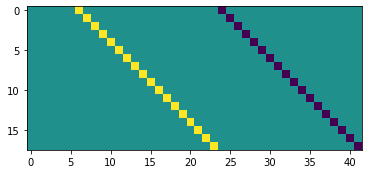

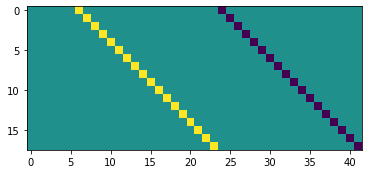

In [17]:
Y_ABnB = np.zeros((2000,24+18,24+18),dtype = complex)

Y_ABnB[:,0:24,0:24] = Y_AB
Y_ABnB[:,24:,24:] =   -1*Y_B

k = 6 + 12 # Extended compatibility and equilibrium to internal dofs
Bu = np.zeros((k,24+18))
Bu[:k,6:6+k] = 1*np.eye(k)
Bu[:k,24:24+k] = -1*np.eye(k)

plt.figure()
plt.imshow(Bu)

Bf = np.zeros((k,24+18))
Bf[:k,6:6+k] = 1*np.eye(k)
Bf[:k,24:24+k] = -1*np.eye(k)

plt.figure()
plt.imshow(Bf)

Apply the LM-FBS based on the defined coompatibility and equilibrium conditions.

In [18]:
Y_An = np.zeros_like(Y_ABnB,dtype = complex)

Y_int = Bu@Y_ABnB@Bf.T
Y_An =Y_ABnB - Y_ABnB@Bf.T@np.linalg.pinv(Y_int)@Bu@Y_ABnB

#### Final results
First extract the FRFs at the reference DoFs:

In [19]:
arr_coup = [0,1,2,3,4,5]
Y_A_coupled = Y_An[:,arr_coup,:][:,:,arr_coup]
Y_A_ref = MK_A.FRF

The decoupled and the reference results can then be compared:

,Name,Description,Quantity,Grouping,Position_1,Position_2,Position_3,Direction_1,Direction_2,Direction_3
0,S1 X,AM_AB_final,Acceleration,100,-75.540099,141.570046,17.000001,0.705057,0.70915,0.0


,Name,Description,Grouping,Quantity,Position_1,Position_2,Position_3,Direction_1,Direction_2,Direction_3
2,H3,AM_AB_final,100,Force,-111.18035,156.180347,0.333333,0.707107,0.707107,0.0


(0.0, 2000.0)

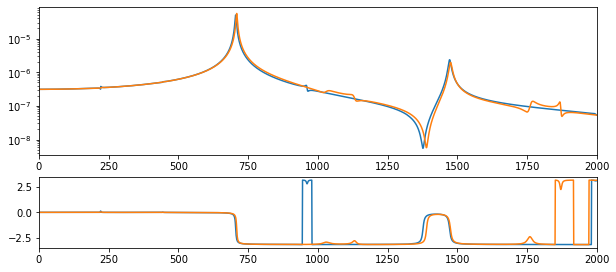

In [20]:
s1 = 0
s2 = 2

display(df_chn_AB_up.loc[[s1]])
display(df_imp_AB_up.loc[[s2]])

plt.figure(figsize = (10,6))
plt.subplot(211)
plt.semilogy(freq,np.abs(Y_A_ref[:,s1,s2]))
plt.semilogy(freq,np.abs(Y_A_coupled[:,s1,s2]))

plt.xlim(0,2000)

plt.subplot(413)
plt.plot(freq,np.angle(Y_A_ref[:,s1,s2]))
plt.plot(freq,np.angle(Y_A_coupled[:,s1,s2]))


plt.xlim(0,2000)